# Kruskal-Wallis test: rationale


The Kruskal-Wallis test is a nonparametric test in the sense that we do NOT make the assumption that the data were generated from a parametric distribution. 

This test uses the idea of the so-called 'one-way ANOVA', where inter-class variation is compared to the total variation. In this nonparametric alternative, we consider the variations of the ranks. It is a generalization of the Mann-Whitney-Wilcoxon test.

# Basic notation and test statistic


Assume that we have $k$ samples $s_{1},..., s_{k}$ and let us consider a Kruskal-Wallis test, which has null hypothesis $H_{0}$:  'All $k \geq 2 $ samples come from the same generating distribution' versus $H_{1}$: 'At least two samples have a different generating distribution', or equivalently $H_{0}$:  'All samples $k \geq 2 $ 
come from the same population'. Let $n_{j}$ be the size of the sample $s_{j}$, for $j=1,..., k$ Let $N = \sum_{j=1}^{k} n_{j}$. Let $S$ be the pooled sample, with all observations from $s_{1},..., s_{k}$ and $R=rank(S)$. Finally, let $\bar{R}_{j}$ be the average rank of the observations from the sample $s_{j}$ in the pooled sample $S$.  Then, the Kruskal-Wallis test statistic, $KW$, is given by

$$
\begin{align*}
KW &=  \frac{12}{N(N-1)} \sum_{j=1}^{k} n_{j} \bigg( \bar{R}_{j} - \frac{N+1}{2}  \bigg)^{2} \\
& = \frac{12}{N(N-1)} \sum_{j=1}^{k} n_{j} \bar{R}_{j}^{2} - 3 \big( N+1  \big) \\
\end{align*}
$$

# Critical region

The distribution of the test statistic $KW$ under $H_{0}$ depends on the $n_{j}$'s and is thus difficult to find in tables. However, the distribution of $KW$ can be simulated from (see example).


The critical region $R_{\alpha}$ has the form

$$
R_{\alpha} = \bigg\{ q_{1-\alpha}, ..., c \bigg\} 
$$


where $q_{1-\alpha}$ is the $(1-\alpha)$-quantile of the distribution of $KW$ under $H_{0}$ and $c$ is the maximum value that can take the test statistic.

# Asymptotic distribution of the test statistic

When the $n_{j}$'s are large, then, under $H_{0}$, the test statistic $KW$ has the following distribution asymptotically

$$
KW \sim \chi_{(k-1)}^{2}
$$


$H_{0}$ is then rejected with an approximate $\alpha$ level of significance if $KW > \chi_{1-\alpha, (k-1)}^{2}$.

# Example 1


\textbf{Example: } With the data of the Seabelts dataset of R, we compute casualty rates for the first semesters of years 1978 to 1981. The data are shown in the table below.Let's first perform the Kruskal-Wallis test. Then, we can simulate from the exact distribution of the test statistic under $H_{0}$ and determine if $H_{0}$ is rejected for those data at $\alpha = 5 \%$ level of significance.

|  $i$  |  $s_{1}$  | $s_{2}$   | $s_{3}$ | $s_{4}$ |
|---:|:-------------|:-----------|:------|:------|
 1  |   15.791    |  16.193   |   11.870  |  9.681                                  
 2  |   12.595    |  11.937   |   9.400   |  9.764             
 3  |   10.405    |  11.968   |   9.322   |  9.154                                 
 4  |   9.836     |   9.376   |   8.200   |  8.330                         
 5  |   8.729     |   9.227   |   8.020   |  8.388                              
 6  |   9.608     |   8.539   |   8.671   |  7.888                                   



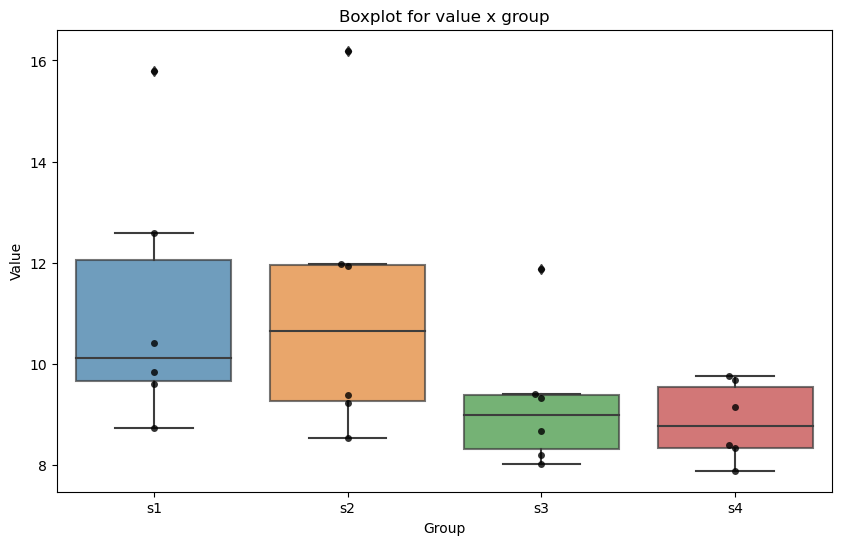

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# number of samples
k = 4

# data
s1 = [15.791, 12.595, 10.405, 9.836, 8.729, 9.608]
s2 = [16.193, 11.937, 11.968, 9.376, 9.227, 8.539]
s3 = [11.870, 9.400, 9.322, 8.200, 8.020, 8.671]
s4 = [9.681, 9.764, 9.154, 8.330, 8.388, 7.888]

# visualization: boxplots
data = pd.DataFrame({
    'value': s1 + s2 + s3 + s4,
    'group': ['s1'] * len(s1) + ['s2'] * len(s2) + ['s3'] * len(s3) + ['s4'] * len(s4)
})

plt.figure(figsize=(10, 6))

# Plot boxplots without custom colors
sns.boxplot(x='group', y='value', data=data, boxprops=dict(alpha=0.7))
sns.swarmplot(x='group', y='value', data=data, color='black', alpha=0.8, size=5)

plt.title('Boxplot for value x group')
plt.xlabel('Group')
plt.ylabel('Value')
plt.show()

# Working example
            
The ranks $R_{j}$ in the pooled sample and the average ranks $\bar{R}_{j}$ are given in the following tables.



| $i$ | $R_{1}$  | $R_{2}$ | $R_{3}$ | $R_{4}$ |
|--:|:------------|:--------|:---------|:-------|
| 1  |   23    |  24   |   19   |  15         |                         
| 2  |   22    |  20   |   13   |  16      |       
| 3  |   18    |  21   |   11   |   9        |                         
| 4  |   17    |  12   |    3   |   4        |                 
| 5  |    8    |  10   |    2   |   5      |                        
| 6  |   14    |   6   |    7   |   1      |



| $i$ | $\bar{R}_{1}$ | $\bar{R}_{2}$ | $\bar{R}_{3}$ | $\bar{R}_{4}$ |
|---:|:------------|:------------|:------------|:------------| 
|    |   17   |  15.5   |  9.17 |  8.33           |                                                          



# Test statistic and test decision

In addition, we have $n_{1}=n_{2}=n_{3}=n_{4} =6$ and $N = \sum_{j=1}^{k} n_{j} = 24$. The value of our test statistic $KW$  is thus


$$
\begin{align}
& \frac{12}{N(N-1)} \sum_{j=1}^{k} n_{j} \bigg( \bar{R}_{j} - \frac{N+1}{2}  \bigg)^{2} \\
& =  \bigg( \frac{12}{24(24-1)}\bigg) \bigg[ 6 (17- 12.5 )^{2} + 6 (15.5-12.5)^{2} + 6(9.17-12.5)^{2} + 6(8.33-12.5)^{2} \bigg] \\
&= 6.927 &\\
\end{align}
$$

Since the $0.95$-quantile of a $\chi_{(3)} = 7.815$, we can not reject $H_{0}$ in this case.

In [71]:
import numpy as np
import pandas as pd
from scipy.stats import rankdata
from scipy.stats import chi2

# number of samples
k = 4

# data
s1 = [15.791, 12.595, 10.405, 9.836, 8.729, 9.608]
s2 = [16.193, 11.937, 11.968, 9.376, 9.227, 8.539]
s3 = [11.870, 9.400, 9.322, 8.200, 8.020, 8.671]
s4 = [9.681, 9.764, 9.154, 8.330, 8.388, 7.888]

# Combine all samples into a single array
all_samples = np.concatenate([s1, s2, s3, s4])
all_samples = np.transpose(all_samples.reshape(4,6))
all_samples

# Assign ranks to the data in the pooled sample
ranks = rankdata(all_samples)
ranks.reshape(6,4)

# Calculate the mean rank for each group
Rbar = np.mean(Rk, axis=0)

# Calculate the total sample size N
N = 4*len(all_samples)

# Calculate the test statistic for the Kruskal-Wallis test
KW = 12/(N*(N+1)) * np.sum(6 * (Rbar - (N+1)/2)**2)

# Degrees of freedom and significance level
df = 3
alpha = 0.05

# Calculate the critical value
critical_value = chi2.ppf(1 - alpha, df)

print("Critical value:", critical_value)
print("Test statistic (KW):", KW)
# the 95% quantile is 7.814728 and so KW = 6.926667 is not in 
# the critical region if we take alpha = 5%.
# Thus we don't reject H0.

Critical value: 7.814727903251179
Test statistic (KW): 6.926666666666667


In [72]:
from scipy.stats import kruskal

# Data
s1 = [15.791, 12.595, 10.405, 9.836, 8.729, 9.608]
s2 = [16.193, 11.937, 11.968, 9.376, 9.227, 8.539]
s3 = [11.870, 9.400, 9.322, 8.200, 8.020, 8.671]
s4 = [9.681, 9.764, 9.154, 8.330, 8.388, 7.888]

# Combine the data into a list of arrays
data_list = [s1, s2, s3, s4]

# Perform the Kruskal-Wallis test
result = kruskal(*data_list)

# Print the result
print("Kruskal-Wallis test statistic:", result.statistic)
print("p-value:", result.pvalue)

Kruskal-Wallis test statistic: 6.926666666666662
p-value: 0.07427225132882118
